In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from timeit import default_timer as timer

In [25]:
df = pd.read_csv('./data/pulsar_stars.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
parameters = {'activation':['relu','logistic'],'hidden_layer_sizes':[(25,),(50,),(100,)],'learning_rate_init':[0.01,0.1]}
clf = GridSearchCV(MLPClassifier(), parameters, cv=2)
start = timer()
clf.fit(X=X_train, y=y_train)
end = timer()
train_time = end - start
print("Find best parameters and score:")
print(clf.best_score_, clf.best_params_)
print(train_time)

Find best parameters and score:
0.9807934069004051 {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
35.04643188399996


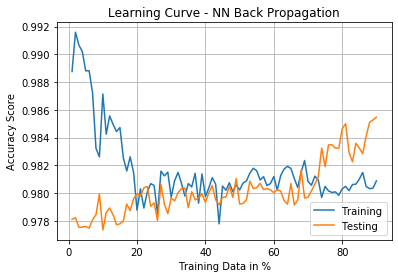

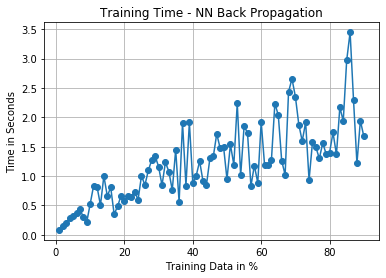

<Figure size 432x288 with 0 Axes>

In [49]:
train_list=[]
test_list=[]
time_list = []
for i in range(1,91):
    clf = MLPClassifier(activation='relu', hidden_layer_sizes=(25,), learning_rate_init=0.01)
    X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, random_state=0, test_size=1-i/100)
    scaler = StandardScaler()
    scaler.fit(X_train_nn)
    X_train_nn = scaler.transform(X_train_nn)
    X_test_nn = scaler.transform(X_test_nn)
    start = timer()
    clf.fit(X=X_train_nn, y=y_train_nn)
    end = timer()
    train_predict = clf.predict(X_train_nn)
    test_predict = clf.predict(X_test_nn)
    train_time = end - start
    train_list.append(accuracy_score(y_train_nn, train_predict))
    test_list.append(accuracy_score(y_test_nn, test_predict))
    time_list.append(train_time)
plt.plot(range(1,91),train_list, label='Training')
plt.plot(range(1,91),test_list, label='Testing')
plt.title("Learning Curve - NN Back Propagation")
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Training Data in %')
plt.ylabel('Accuracy Score')
plt.show()
plt.clf() 

plt.title("Training Time - NN Back Propagation")
plt.grid()
plt.xlabel('Training Data in %')
plt.ylabel('Time in Seconds')
plt.plot(range(1,91), time_list,'o-')
plt.show()
plt.clf()

In [37]:
def plot_time_curve(title, iterations, training_times):
    plt.switch_backend('Agg')
    %matplotlib inline
    plt.title(title)
    plt.grid()
    plt.xlabel('# of Interations')
    plt.ylabel('Time in Seconds')
    plt.plot(iterations, training_times,'o-')
    plt.show()
    plt.clf()


def plot_accuracy_curve(title, iterations, accuracies):
    plt.switch_backend('Agg')
    %matplotlib inline
    plt.title(title)
    plt.grid()
    plt.xlabel('# of Interations')
    plt.ylabel('Accuracy Score')
    plt.plot(iterations, accuracies,'o-')
    plt.show()
    plt.clf()

In [29]:
# Random Hill Climb
iterations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
#max_attempts_list = [10, 50, 100]
#max_iters = 1500
train_times_1 = []
accuracies_1 = []
for max_iters in iterations:
    total_runs = range(5)
    best_acc = 0
    best_time = float("inf")
    
    clf_1 = mlrose.NeuralNetwork(hidden_nodes = [25], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

    # Run each algorithm multiple times on the same settings to avoid local optima in results graphs
    for run in total_runs:
        # Train and algorithms
        start_1 = timer()
        clf_1.fit(X_train, y_train)
        end_1 = timer()
        train_time_1 = end_1 - start_1

        # Predict accuracy Scores
        y_pred_1 = clf_1.predict(X_test)
        acc_1 = accuracy_score(y_test, y_pred_1)

        if train_time_1 < best_time:
            best_time = train_time_1
        if acc_1 > best_acc:
            best_acc = acc_1

    train_times_1.append(best_time)
    accuracies_1.append(best_acc)
    
# Simulated Annealing
train_times_2 = []
accuracies_2 = []
for max_iters in iterations:
    total_runs = range(5)
    best_acc = 0
    best_time = float("inf")
    
    clf_2 = mlrose.NeuralNetwork(hidden_nodes = [25], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

    # Run each algorithm multiple times on the same settings to avoid local optima in results graphs
    for run in total_runs:
        # Train and algorithms
        start_2 = timer()
        clf_2.fit(X_train, y_train)
        end_2 = timer()
        train_time_2 = end_2 - start_2

        # Predict accuracy Scores
        y_pred_2 = clf_2.predict(X_test)
        acc_2 = accuracy_score(y_test, y_pred_2)

        if train_time_2 < best_time:
            best_time = train_time_2
        if acc_2 > best_acc:
            best_acc = acc_2

    train_times_2.append(best_time)
    accuracies_2.append(best_acc)
    
# Genetic Algorithm
train_times_3 = []
accuracies_3 = []
for max_iters in iterations:
    total_runs = range(5)
    best_acc = 0
    best_time = float("inf")
    
    clf_3 = mlrose.NeuralNetwork(hidden_nodes = [25], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

    # Run each algorithm multiple times on the same settings to avoid local optima in results graphs
    for run in total_runs:
        # Train and algorithms
        start_3 = timer()
        clf_3.fit(X_train, y_train)
        end_3 = timer()
        train_time_3 = end_3 - start_3

        # Predict accuracy Scores
        y_pred_3 = clf_3.predict(X_test)
        acc_3 = accuracy_score(y_test, y_pred_3)

        if train_time_3 < best_time:
            best_time = train_time_3
        if acc_3 > best_acc:
            best_acc = acc_3

    train_times_3.append(best_time)
    accuracies_3.append(best_acc)

[1.0182405189998462, 2.013149617000181, 3.037137736999739, 4.049303250999856, 5.049333252999986, 6.059541528999944, 7.080966854000053, 8.097852582000087, 9.13953254900025, 10.208591743999932, 15.262894175000383]
[0.6935754189944134, 0.7011173184357542, 0.7136871508379888, 0.7223463687150838, 0.7329608938547486, 0.7418994413407821, 0.7575418994413408, 0.7650837988826815, 0.7759776536312849, 0.788268156424581, 0.8410614525139665]
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]


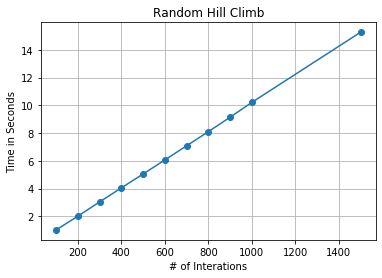

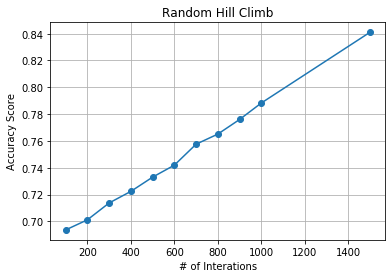

<Figure size 432x288 with 0 Axes>

In [38]:
print(train_times_1)
print(accuracies_1)
print(iterations)
plot_time_curve("Random Hill Climb", iterations, train_times_1)
plot_accuracy_curve("Random Hill Climb", iterations, accuracies_1)

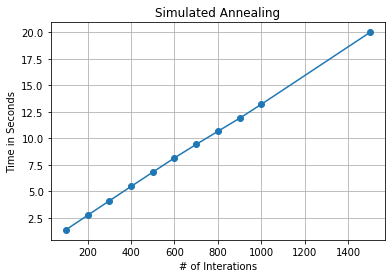

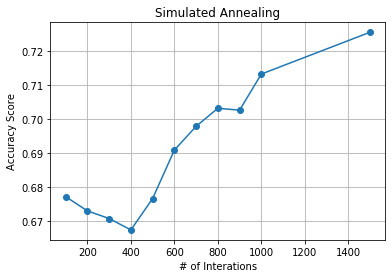

<Figure size 432x288 with 0 Axes>

In [39]:
plot_time_curve("Simulated Annealing", iterations, train_times_2)
plot_accuracy_curve("Simulated Annealing", iterations, accuracies_2)

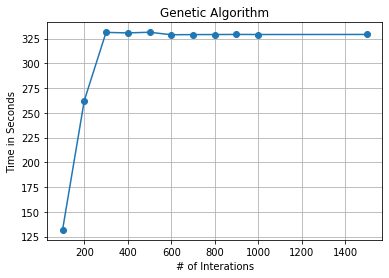

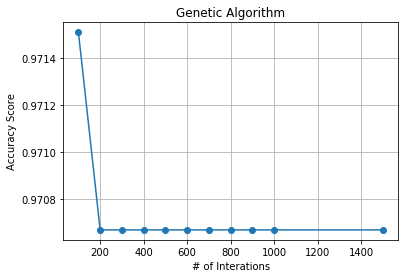

<Figure size 432x288 with 0 Axes>

In [40]:
plot_time_curve("Genetic Algorithm", iterations, train_times_3)
plot_accuracy_curve("Genetic Algorithm", iterations, accuracies_3)

In [44]:
# Random Hill Climb
max_attempts_list = [10, 50, 100]
max_iters = 5000
train_times_4 = []
accuracies_4 = []
for max_attempts in max_attempts_list:    
    print("Random Hill Climb with max attempts:")
    print(max_attempts)
    clf_4 = mlrose.NeuralNetwork(hidden_nodes = [25], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = max_attempts, \
                                 random_state = 3)

    start_4 = timer()
    clf_4.fit(X_train, y_train)
    end_4 = timer()
    train_time_4 = end_4 - start_4

    # Predict accuracy Scores
    y_pred_4 = clf_4.predict(X_test)
    acc_4 = accuracy_score(y_test, y_pred_4)

    train_times_4.append(train_time_4)
    accuracies_4.append(acc_4)
    
# Simulated Annealing
train_times_5 = []
accuracies_5 = []
for max_attempts in max_attempts_list: 
    print("Simulated Annealing with max attempts:")
    print(max_attempts)
    clf_5 = mlrose.NeuralNetwork(hidden_nodes = [25], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = max_attempts, \
                                 random_state = 3)

    start_5 = timer()
    clf_5.fit(X_train, y_train)
    end_5 = timer()
    train_time_5 = end_5 - start_5

    # Predict accuracy Scores
    y_pred_5 = clf_5.predict(X_test)
    acc_5 = accuracy_score(y_test, y_pred_5)

    train_times_5.append(train_time_5)
    accuracies_5.append(acc_5)
    
# Genetic Algorithm
train_times_6 = []
accuracies_6 = []
for max_attempts in max_attempts_list:    
    print("Genetic Algorithm with max attempts:")
    print(max_attempts)
    clf_6 = mlrose.NeuralNetwork(hidden_nodes = [25], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = max_attempts, \
                                 random_state = 3)

    start_6 = timer()
    clf_6.fit(X_train, y_train)
    end_6 = timer()
    train_time_6 = end_6 - start_6

    # Predict accuracy Scores
    y_pred_6 = clf_6.predict(X_test)
    acc_6 = accuracy_score(y_test, y_pred_6)

    train_times_6.append(train_time_6)
    accuracies_6.append(acc_6)

Random Hill Climb with max attempts:
10
Random Hill Climb with max attempts:
50
Random Hill Climb with max attempts:
100
Simulated Annealing with max attempts:
10
Simulated Annealing with max attempts:
50
Simulated Annealing with max attempts:
100
Genetic Algorithm with max attempts:
10
Genetic Algorithm with max attempts:
50
Genetic Algorithm with max attempts:
100


[10, 50, 100]
[0.9231692879984621, 55.3584831219996, 55.03426512299848]


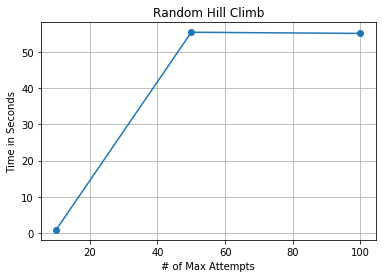

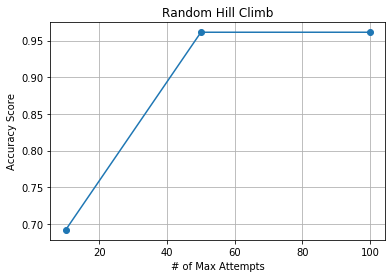

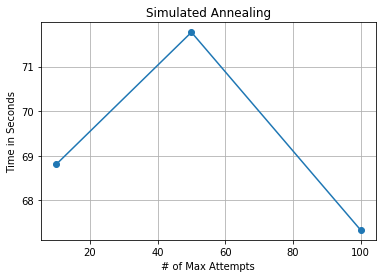

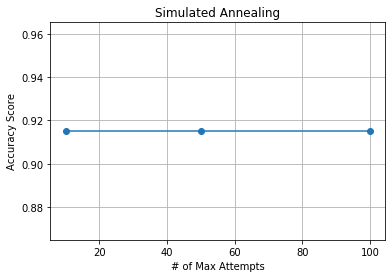

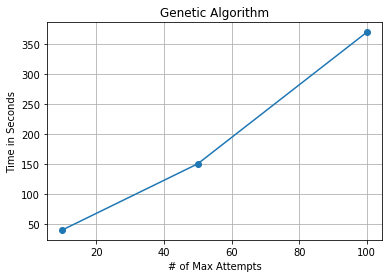

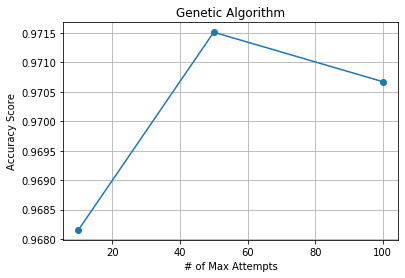

<Figure size 432x288 with 0 Axes>

In [48]:
def plot_time_curve_2(title, max_attempts_list, training_times):
    plt.switch_backend('Agg')
    %matplotlib inline
    plt.title(title)
    plt.grid()
    plt.xlabel('# of Max Attempts')
    plt.ylabel('Time in Seconds')
    plt.plot(max_attempts_list, training_times,'o-')
    plt.show()
    plt.clf()

def plot_accuracy_curve_2(title, max_attempts_list, accuracies):
    plt.switch_backend('Agg')
    %matplotlib inline
    plt.title(title)
    plt.grid()
    plt.xlabel('# of Max Attempts')
    plt.ylabel('Accuracy Score')
    plt.plot(max_attempts_list, accuracies,'o-')
    plt.show()
    plt.clf()
    
print(max_attempts_list)
print(train_times_4)
plot_time_curve_2("Random Hill Climb", max_attempts_list, train_times_4)
plot_accuracy_curve_2("Random Hill Climb", max_attempts_list, accuracies_4)

plot_time_curve_2("Simulated Annealing", max_attempts_list, train_times_5)
plot_accuracy_curve_2("Simulated Annealing", max_attempts_list, accuracies_5)

plot_time_curve_2("Genetic Algorithm", max_attempts_list, train_times_6)
plot_accuracy_curve_2("Genetic Algorithm", max_attempts_list, accuracies_6)